<a href="https://colab.research.google.com/github/MehmetCanYildirim/Projects/blob/main/%5BRNN%5D_EEG_Emotion_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This dataset consists of recorded Electroencephalograpy (EEG) brain wave data and the emotional state of these brain waves label. These labels are divided into 3 class which are positive, neutral, and negative moods.

You can find the datasets in kaggle which is the very popular website for datasets, educations, and some competitions that you can join.

Here is the link of the dataset: https://www.kaggle.com/birdy654/eeg-brainwave-dataset-feeling-emotions?select=emotions.csv

In this study, I scrutinized EEG signals which are the recorded from sculp for electrical activity of brain to detect emotional state in different situations by using Recurrent Neural Network (RNN).

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [3]:
from google.colab import files


uploaded = files.upload()


Saving emotions.csv to emotions.csv


In [4]:
data = pd.read_csv('emotions.csv')
data

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,mean_d_0_a2,mean_d_1_a2,mean_d_2_a2,mean_d_3_a2,mean_d_4_a2,mean_d_5_a,mean_d_6_a,mean_d_7_a,mean_d_8_a,mean_d_9_a,mean_d_10_a,mean_d_11_a,mean_d_12_a,mean_d_13_a,mean_d_14_a,mean_d_15_a,mean_d_16_a,mean_d_17_a,mean_d_18_a,mean_d_19_a,mean_d_20_a,mean_d_21_a,mean_d_22_a,mean_d_23_a,mean_d_24_a,mean_d_25_a,mean_d_26_a,mean_d_27_a,mean_d_28_a,mean_d_29_a,...,fft_711_b,fft_712_b,fft_713_b,fft_714_b,fft_715_b,fft_716_b,fft_717_b,fft_718_b,fft_719_b,fft_720_b,fft_721_b,fft_722_b,fft_723_b,fft_724_b,fft_725_b,fft_726_b,fft_727_b,fft_728_b,fft_729_b,fft_730_b,fft_731_b,fft_732_b,fft_733_b,fft_734_b,fft_735_b,fft_736_b,fft_737_b,fft_738_b,fft_739_b,fft_740_b,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.620,30.3,-356.0,15.60,26.3,1.070,0.411,-15.700,2.060,3.15,2.15,29.5,-353.0,14.40,21.5,5.98,30.7,-343.0,14.70,27.9,3.170,32.2,-368.0,15.90,36.4,7.08,28.8,-359.0,17.30,19.6,-3.8300,-1.230,-10.80000,-0.363,-6.41,-1.03,-2.780,14.600,-1.540,-14.900000,...,30.90,-24.4,-24.4,30.90,-442.0,388.0,-197.0,-197.0,388.0,-564.0,500.00,-245.00,-245.00,500.00,-88.8,214.0,-88.8,-88.8,214.0,-606.0,509.000,-261.0,-261.0,509.000,-399.0,374.00,-185.00,-185.00,374.00,74.3,23.50,20.300,20.300,23.50,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.800,33.1,32.0,25.80,22.8,6.550,1.680,2.880,3.830,-4.82,25.60,32.8,29.6,21.50,17.4,25.50,31.7,31.5,26.20,32.9,31.800,33.1,33.2,28.50,26.8,32.40,34.7,33.8,27.00,14.2,0.0342,1.100,-1.87000,-4.690,-15.40,-6.22,-0.328,-3.530,-6.980,-9.370000,...,-5.99,-19.1,-19.1,-5.99,163.0,-11.0,-10.7,-10.7,-11.0,117.0,-3.93,17.90,17.90,-3.93,112.0,-13.9,25.5,25.5,-13.9,225.0,-0.968,-27.7,-27.7,-0.968,97.4,-19.00,40.70,40.70,-19.00,130.0,-23.30,-21.800,-21.800,-23.30,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.900,29.4,-416.0,16.70,23.7,79.900,3.360,90.200,89.900,2.03,7.75,30.1,-441.0,9.89,25.3,-68.90,25.3,-481.0,-65.40,20.0,79.800,31.0,-408.0,91.90,29.5,18.80,31.1,-335.0,32.20,19.9,76.6000,4.850,39.90000,75.300,5.27,-72.00,-0.843,-33.000,-82.000,-4.200000,...,585.00,-285.0,-285.0,585.00,-94.3,183.0,-110.0,-110.0,183.0,-133.0,200.00,-72.00,-72.00,200.00,-356.0,295.0,-158.0,-158.0,295.0,-251.0,255.000,-95.7,-95.7,255.000,-177.0,159.00,-48.80,-48.80,159.00,-534.0,462.00,-233.000,-233.000,462.00,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.900,31.6,-143.0,19.80,24.3,-0.584,-0.284,8.820,2.300,-1.97,17.30,32.0,-148.0,20.40,22.8,13.20,31.5,-147.0,16.90,27.7,15.700,30.7,-142.0,20.70,22.8,13.60,32.2,-135.0,21.20,23.8,4.1500,0.556,-0.35400,3.460,-4.96,1.63,1.330,-5.830,-0.298,0.000777,...,249.00,-146.0,-146.0,249.00,359.0,-146.0,13.7,13.7,-146.0,119.0,-7.64,-7.17,-7.17,-7.64,-296.0,316.0,-218.0,-218.0,316.0,322.0,-113.000,38.4,38.4,-113.000,245.0,-61.90,-5.08,-5.08,-61.90,-183.0,299.00,-243.000,-243.000,299.00,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.300,31.3,45.2,27.30,24.5,34.800,-5.790,3.060,41.400,5.52,26.10,34.3,43.7,23.70,20.6,-3.87,34.1,43.7,-10.00,22.9,59.400,26.7,60.3,64.70,26.9,32.30,30.1,33.6,31.60,27.7,30.0000,0.276,-0.00677,33.700,-2.36,-33.30,7.640,-16.600,-41.100,-6.290000,...,18.30,-11.9,-11.9,18.30,159.0,-18.2,-25.6,-25.6,-18.2,194.0,32.70,-54.50,-54.50,32.70,154.0,26.4,-56.4,-56.4,26.4,252.0,9.940,-37.4,-37.4,9.940,172.0,15.90,-7.25,-7.25,15.90,114.0,12.00,38.100,38.100,12.00,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2127,32.400,32.2,32.2,30.80,23.4,1.640,-2.030,0.647,-0.121,-1.10,33.30,33.4,31.0,32.30,18.6,30.00,33.0,32.6,29.50,29.1,32.000,29.9,32.6,28.50,24.9,34.50,32.4,32.4,33.00,20.8,3.3500,0.461,-1.61000,2.880,-10.60,1.31,3.490,-1.540,3.860

In [5]:
data['label'].value_counts()

NEUTRAL     716
NEGATIVE    708
POSITIVE    708
Name: label, dtype: int64

In [6]:
label_mapping = {'NEGATIVE':0, 'NEUTRAL':1 , 'POSITIVE':2}

In [7]:
data['label'].replace(label_mapping)

0       0
1       1
2       2
3       2
4       1
       ..
2127    1
2128    2
2129    0
2130    0
2131    1
Name: label, Length: 2132, dtype: int64

In [8]:
def preprocessing(df):
    df = df.copy()
    df['label'] = df['label'].replace(label_mapping)
    y = df['label'].copy()
    X = df.drop('label', axis=1).copy()

    X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8)
    return X_train, X_test, y_train, y_test

In [9]:
X_train, X_test, y_train, y_test = preprocessing(data)

In [10]:
X_train.shape

(1705, 2548)

In [11]:
inputs = tf.keras.Input(shape=(X_train.shape[1],))
new_inputs = tf.expand_dims(inputs, axis=2)
gru_layer = tf.keras.layers.GRU(64,return_sequences=True, return_state = False)(new_inputs)
flatten_layer = tf.keras.layers.Flatten()(gru_layer)
outputs = tf.keras.layers.Dense(3, activation='softmax')(flatten_layer)

model = tf.keras.Model(inputs= inputs, outputs=outputs)

print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 2548)]            0         
_________________________________________________________________
tf.expand_dims (TFOpLambda)  (None, 2548, 1)           0         
_________________________________________________________________
gru (GRU)                    (None, 2548, 64)          12864     
_________________________________________________________________
flatten (Flatten)            (None, 163072)            0         
_________________________________________________________________
dense (Dense)                (None, 3)                 489219    
Total params: 502,083
Trainable params: 502,083
Non-trainable params: 0
_________________________________________________________________
None


In [12]:
model.compile(optimizer='adam',
             loss ='sparse_categorical_crossentropy',
             metrics=['accuracy']
             )

history = model.fit(X_train,
                    y_train,
                    batch_size=32,
                    epochs=50,
                    validation_split=0.2)

Epoch 1/50
43/43 [==============================] - 52s 1s/step - loss: 19.9206 - accuracy: 0.7053 - val_loss: 3.4043 - val_accuracy: 0.9062
Epoch 2/50
43/43 [==============================] - 49s 1s/step - loss: 1.7473 - accuracy: 0.8952 - val_loss: 0.5696 - val_accuracy: 0.9296
Epoch 3/50
43/43 [==============================] - 49s 1s/step - loss: 0.3494 - accuracy: 0.9633 - val_loss: 0.3092 - val_accuracy: 0.9589
Epoch 4/50
43/43 [==============================] - 49s 1s/step - loss: 0.1912 - accuracy: 0.9663 - val_loss: 0.3734 - val_accuracy: 0.9736
Epoch 5/50
43/43 [==============================] - 49s 1s/step - loss: 0.0464 - accuracy: 0.9883 - val_loss: 0.3729 - val_accuracy: 0.9707
Epoch 6/50
43/43 [==============================] - 49s 1s/step - loss: 0.0205 - accuracy: 0.9941 - val_loss: 0.4266 - val_accuracy: 0.9501
Epoch 7/50
43/43 [==============================] - 49s 1s/step - loss: 0.0058 - accuracy: 0.9978 - val_loss: 0.3399 - val_accuracy: 0.9736
Epoch 8/50
43/43 [=

In [13]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 0.43592846393585205
Test accuracy: 0.9648711681365967


              precision    recall  f1-score   support

    NEGATIVE       0.97      0.99      0.98       147
     NEUTRAL       0.97      0.96      0.97       141
    POSITIVE       0.95      0.94      0.95       139

    accuracy                           0.96       427
   macro avg       0.96      0.96      0.96       427
weighted avg       0.96      0.96      0.96       427



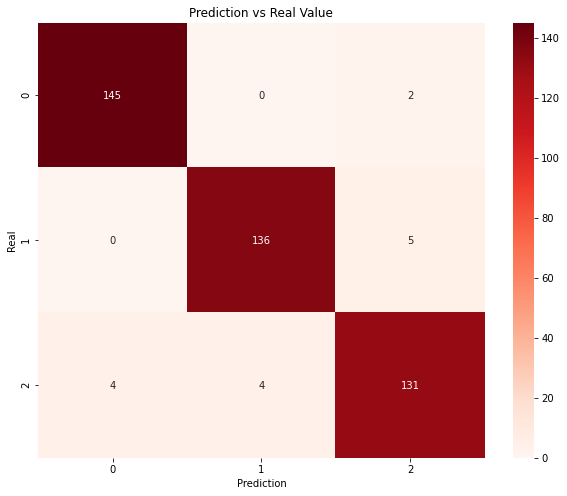

In [14]:
yprediction = np.array(list(map(lambda a: np.argmax(a), model.predict(X_test))))


con_mat = confusion_matrix(y_test, yprediction)
class_rep = classification_report(y_test, yprediction, target_names = label_mapping.keys())
print(class_rep)

plt.figure(figsize=(10,8))
sns.heatmap(con_mat, annot = True, vmin=0, cbar = True, fmt ='g', cmap='Reds')
plt.xlabel('Prediction')
plt.ylabel('Real')
plt.title("Prediction vs Real Value")
plt.show()